Задачи

- Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
- Какой клиент совершил больше всего успешных операций? (success == True)
- С какой платформы осуществляется наибольшее количество успешных операций?
- Какую платформу предпочитают премиумные клиенты?
- Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
- Постройте график распределения числа успешных операций
- Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
Описание данных

user_data:

- client – идентификатор пользователя
- premium – является ли клиент премиум
- age – возраст

logs:

- client – идентификатор пользователя
- success – результат (успех - 1, нет - 0)
- platform – платформа
- time – время в формате Unix

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import datetime

In [2]:
user_data = pd.read_csv('/home/jupyter-i-minin-22/python/lesson3/минипроект/3_user_data.csv')

In [5]:
logs = pd.read_csv('/home/jupyter-i-minin-22/python/lesson3/минипроект/3_logs.csv')

In [4]:
user_data.head(3)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64


In [6]:
logs.head(3)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894


Сколько уникальных значений принимает переменная platform

In [8]:
logs.platform.nunique()

3

Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику.

In [12]:
logs.shape

(4500, 4)

In [14]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [16]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


ДОПОЛНИТЕЛЬНО:

In [43]:
logs.isnull().values.any() #проверил, содержит ли датафрейм пустые значения, False - не содержит

False

In [45]:
logs.client.isnull().values.any() #также можно проверить по каждому столбцу

False

In [54]:
logs.isnull().sum() #также можно проверить сумму НаН значений

client      0
success     0
platform    0
time        0
dtype: int64

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

In [17]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [66]:
logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success' : 'count'}) \
    .rename(columns={'success' : 'success_number'}) \
    .sort_values('success_number', ascending = False) \
    .value_counts('success_number')

success_number
1     2791
2       43
41       9
40       1
3        1
dtype: int64

вижу, что 9 человек совершили большее количество успешных операций (41). Далее, можно сохранить в новый датафрейм получившийся итог (убрав из вычислений сортировка и подсчет значений), и в нем методом query можно выбрать клиентов, у которых 41 успешная операция

In [75]:
success_df = logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success' : 'count'}) \
    .rename(columns={'success' : 'success_number'}) \
    .sort_values('success_number', ascending = False)

In [77]:
success_df

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [79]:
success_df.query('success_number == 41') \
    .sort_values('client')

,client,success_number
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


чтобы вручную не записывать ответ в LMS - сделаем из значений список методом tolist (обратиться к колонке, которую хотим перевернуть в список, и применить метод)

In [118]:
success_df.query('success_number == 41') \
    .sort_values('client') \
    .client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

ДОПОЛНИТЕЛЬНО: сделаем из списка строку
цикл for, print c параметром end (по умолчанию end равен переносу строки)

In [120]:
for i in success_df.query('success_number == 41').client:
    print(i, end = ', ')

12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719, 

С какой платформы осуществляется наибольшее количество успешных операций?

In [86]:
logs.query('success == True') \
    .groupby('platform', as_index = False) \
    .agg({'success' : 'count'}) \
    .sort_values('success', ascending = False)

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [88]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [122]:
logs.query('success == True').value_counts('platform') #более простая альтернатива

platform
phone       2019
computer    1090
tablet       180
dtype: int64

Какая платформа наиболее популярна среди премиумных клиентов?

In [97]:
user_data.merge(logs, on = 'client')

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [109]:
user_data.merge(logs, on = 'client').isna().any()

client      False
premium     False
age         False
success     False
platform    False
time        False
dtype: bool

In [110]:
df = user_data.merge(logs, on = 'client')

In [111]:
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [114]:
df.query('premium == True') \
    .groupby('platform', as_index = False) \
    .agg({'time' : 'count'})

,platform,time
0,computer,150
1,phone,246
2,tablet,24


In [124]:
df.query('premium == True').platform.value_counts() # альтернативное решение

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. 

In [125]:
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


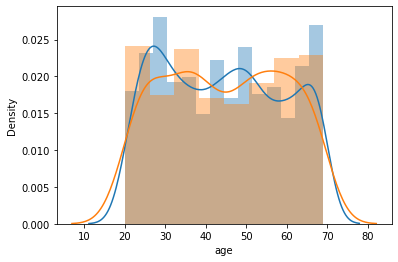

In [147]:
ax = sns.distplot(df.query('premium == False').age)
ax = sns.distplot(df.query('premium == True').age)

Постройте график распределения числа успешных операций: 

 - x – число успешных операций
 - y – число клиентов, совершивших столько успешных операций

Сгруппируйте данные по клиентам и посчитайте число успешных операций. 

Далее постройте гистограмму распределения этой величины с помощью sns.distplot

In [163]:
success_num_per_client = df \
    .groupby('client', as_index = False) \
    .agg({'success' : 'sum'})

In [164]:
success_num_per_client

,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1
...,...,...
2949,99926,1
2950,99927,1
2951,99931,1
2952,99952,0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


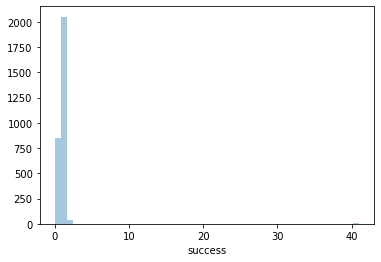

In [167]:
ax = sns.distplot(success_num_per_client.success, kde = False)

большинство клиентов делали 1-3 операции, но есть небольшой пик у 40 (+ график построился от 0 до 40)

Можно посмотреть распределение, использовав value_counts (посмотреть, почему график построился именно таким образом, т.е. до 40)

In [171]:
success_num_per_client.success.value_counts()

1     2051
0      850
2       42
41       9
3        1
40       1
Name: success, dtype: int64

у нас есть 9 клиентов, которые совершили 41 успешную операцию

⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Я решил задание с использованием barplot

In [192]:
computer_age_success = df.query("platform == 'computer'") \
    .groupby('age', as_index = False) \
    .agg({'success' : 'sum'}) \
    .sort_values('success', ascending = False)

In [193]:
computer_age_success

,age,success
8,28,49
29,49,33
5,25,33
12,32,27
48,68,26
4,24,26
49,69,24
45,65,23
32,52,22
34,54,22


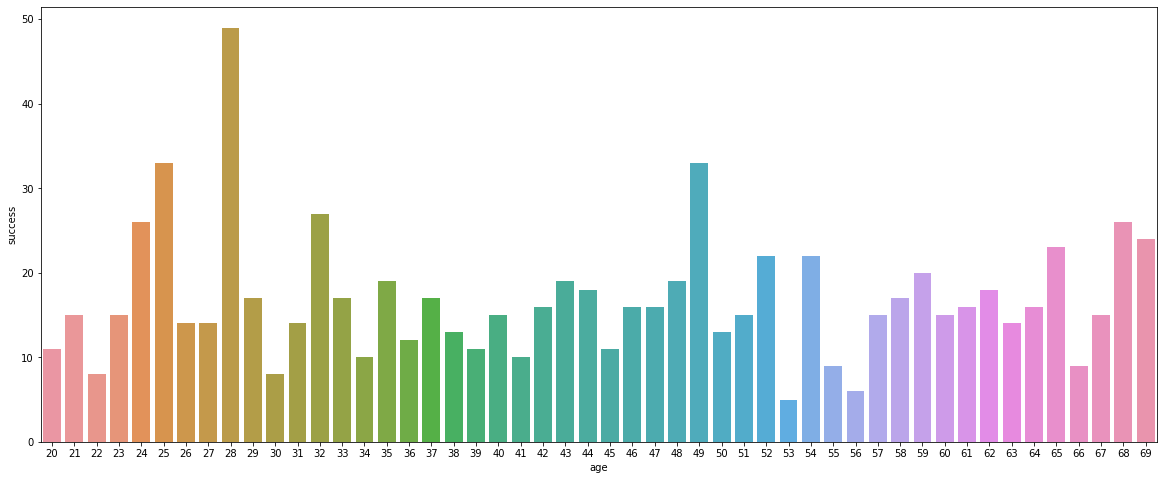

In [199]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="age", y="success", data=computer_age_success)

Добавил параметр ORDER, задается порядок по столбцу, по которому хотим отсортировать

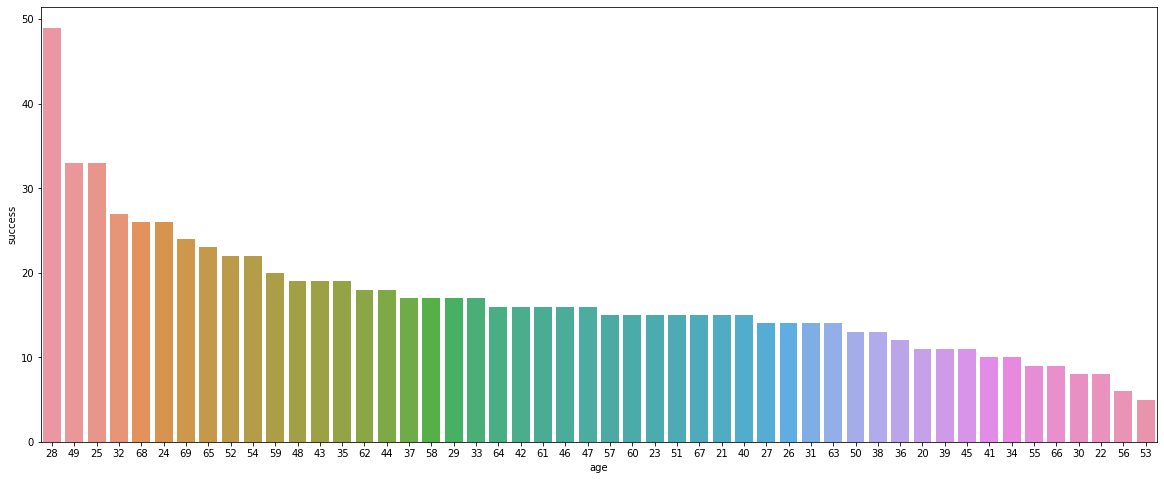

In [201]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="age", y="success", data=computer_age_success, order=computer_age_success.age)

АЛЬТЕРНАТИВНОЕ решение задачи с построением через countplot. 

countplot похож на value_counts, т.е. считает частоту встречаемости

In [196]:
df.query('success == True and platform == "computer"')

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


In [197]:
result_df_count_plot = df.query('success == True and platform == "computer"')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


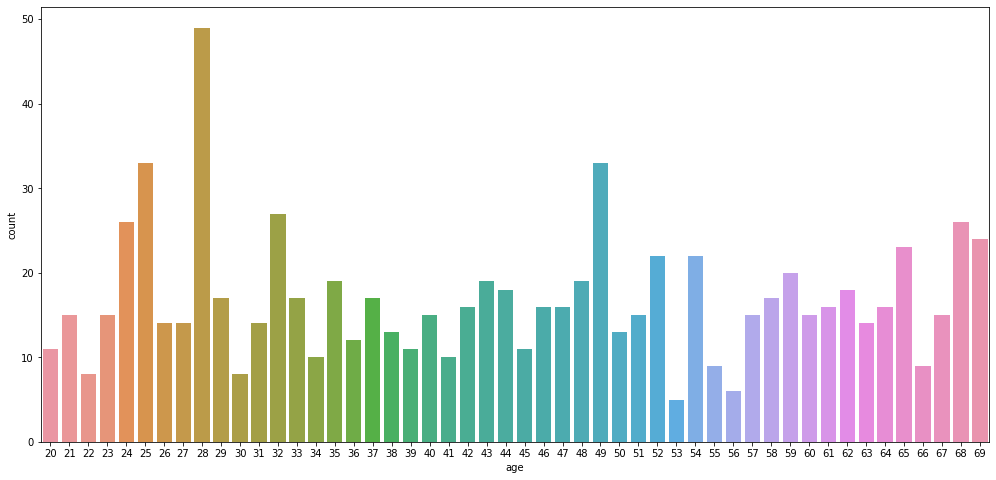

In [198]:
plt.figure(figsize=(17, 8))
sns.countplot(result_df_count_plot.age)